Look at what the functions in the boundary "wings" (low position - high steepness or high position - low steepness) look like:

Not run again when copying into the repository for the paper, paths may need to be updated.

In [1]:
import sys,os
path_to_eigen="/Users/rosamartinezcorral/Documents/eigenlibrary/eigen-eigen-323c052e1731/" #for backward compatibility, no longer required
path_to_polynomials="\"/Users/rosamartinezcorral/Dropbox (HMS)/work2/shared_fromothers/polynomials_multiprecision/polynomials/include/polynomial/\""
path_to_utilsGRF="\"/Users/rosamartinezcorral/Dropbox (HMS)/work2/shared/utilsGRF\"" #GeneRegulatoryFunctions repo
path_to_utilsGRF_="/Users/rosamartinezcorral/Dropbox (HMS)/work2/shared/utilsGRF" #GeneRegulatoryFunctions repo
sys.path.append(path_to_utilsGRF_)

import AnalyseBoundarysearch
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import BoundaryFinder as BF
import alphashape
import time

In [2]:
sys.path.append("../bin")
import N4univ
instance100=N4univ.GRFCalculations_100_100_15()

In [3]:
def makeplot(parset,instance=None,xmin=-6,xmax=6,xlim0=None,xlim1=None,n=10000,ylim0_g=None,ylim1_g=None):
    othervars=np.array([0])
    xvals=np.logspace(xmin,xmax,n)
    log10xvals=np.log10(xvals)
    instance.fill_num_den(parset,othervars)
    
    out_notnorm=np.zeros(len(xvals))
    for x_ in range(n):
        out_notnorm[x_]=instance.interfaceGRF(xvals[x_])
    
    pos,stp,x05=instance.interfaceps(minx0=False,maxx1=False,absder=True) #this will normalise the coefficients
    posraw=pos*x05
    stpraw=stp/x05
    
    
    print("pos:",pos,"stp:",stp,"x05:",x05, "raw position:", posraw, "raw steepness:", stpraw)
    
    out=np.zeros(len(xvals)) #this will be normalised
    for x_ in range(n):
        out[x_]=instance.interfaceGRF(xvals[x_])
        
    fig,axes=plt.subplots(1,3,figsize=(12,4))
    
    ax=axes[0] #plot of original function
    ax.set_title("original f, der")
    ax.set_xlabel("log10(x)")
    ax.set_ylabel("f(x) (not normalised)")
    ax.plot(log10xvals,out_notnorm,color="k")
    ax.set_xlim(np.min([min(log10xvals),np.log10(0.01*posraw)]),np.max([max(log10xvals),np.log10(100*x05)]))
    ax.axvline(x=np.log10(posraw),linestyle=":",color="gray")
    ax.text(np.log10(posraw),0,"raw pos")
    ax.axvline(x=np.log10(x05),linestyle="--",color="gray")
    ax.text(np.log10(x05),0,"x05")
    
    ax=ax.twinx()#plot of original function derivative
    der_notnorm=np.diff(out_notnorm)/np.diff(xvals)
    ax.plot(log10xvals[:-1],der_notnorm,color="r")
    ax.set_ylabel("df(x)/dx (not normalised)",color="r")
    ax.axhline(y=stpraw,linestyle=":",color="r")
    
    ax=axes[1] #plot of original function around the position
    ax.set_title("around posraw, linear sc")
    ax.set_xlabel("x")
    ax.set_ylabel("f(x) (not normalised)")
    ax.plot(xvals,out_notnorm,color="k")
    #ax.axvline(x=np.log10(x05),linestyle="--",color="gray")
    
    ax.axvline(x=posraw,linestyle=":",color="gray")
    xpos=np.where(xvals>=posraw)[0][0]
    out_notnorm_xpos=out_notnorm[xpos]
    #ylimlower=out_notnorm[0]
    ylimlower=out_notnorm_xpos*0.9
    xlimlower=0.5*posraw
    xlimupper=2*posraw
    ax.set_ylim(ylimlower,out_notnorm_xpos*1.1)
    ax.set_xlim(xlimlower,xlimupper)
    #ax.text(np.log10(x05),ylimlower,"x05")
    ax.text(posraw,ylimlower,"raw pos")
    
    ax=ax.twinx()
    ax.plot(xvals[:-1],der_notnorm,color="r")
    ax.set_ylabel("df/dx",color="r")
    ax.set_xlim(xlimlower,xlimupper)
    #ax.set_xscale("log")
    
    
    ax=axes[2]
    ax.set_title("normalised function and derivative")
    ax.plot(log10xvals,out,color="k",label="normalised f")
    ax.axvline(x=0,linestyle="--",color="gray")
    ax.axvline(x=np.log10(pos),linestyle=":",color="gray")
    ax.text(np.log10(pos),0,"pos")
    ax.set_xlabel("log10(x)")
    ax.set_ylabel("g(y)")
    ax.set_xlim(xlim0,xlim1)
    ax.set_ylim(ylim0_g,ylim1_g)
    
    ax=ax.twinx()
    der=np.diff(out)/np.diff(xvals) #note that we define g(y)=f(y*x05), so the xvals are the original ones
    ax.plot(log10xvals[:-1],der,color="orange",label="derivative")
    ax.plot(log10xvals[:-1],np.abs(der),color="red",label="abs(derivative)")
    ax.set_xlim(xlim0,xlim1)


    #ax.axvline(x=np.log10(pos),linestyle=":",color="gray")
    ax.axhline(y=stp,linestyle=":",color="r")
    #ax.set_xlabel("log10(x)")
    ax.set_ylabel("abs(dg(y)/dx)",color="r")
    
    
    plt.tight_layout()
    plt.show()

# From first search, moderately extreme

In [4]:
checkf="/Users/rosamartinezcorral/Dropbox (HMS)/data/2021_12_boundaries/2022_04_05_N4univ_allregion/tocheck_N4univ"
checkedfiles1=[x for x in os.listdir(checkf) if ".out" in x and "checked" in x]#all parameter sets tested with max derivative not at 0 and coincident result with mathematica

In [5]:
checkedfiles1

['mat_N4univ_13_checked.out',
 'mat_N4univ_7_checked.out',
 'mat_N4univ_2_checked.out',
 'mat_N4univ_8_checked.out',
 'mat_N4univ_15_checked.out',
 'mat_N4univ_1_checked.out',
 'mat_N4univ_4_checked.out',
 'mat_N4univ_10_checked.out',
 'mat_N4univ_3_checked.out',
 'mat_N4univ_6_checked.out',
 'mat_N4univ_12_checked.out',
 'mat_N4univ_11_checked.out',
 'mat_N4univ_5_checked.out',
 'mat_N4univ_0_checked.out',
 'mat_N4univ_14_checked.out',
 'mat_N4univ_9_checked.out']

In [6]:
alldata=[]
for f in checkedfiles1:
    
    data=pd.read_csv(os.path.join(checkf,f),sep=",|;",engine="python") #sep and engine are used to indicate that there are 2 separators
    alldata.append(data)
alldata=pd.concat(alldata)


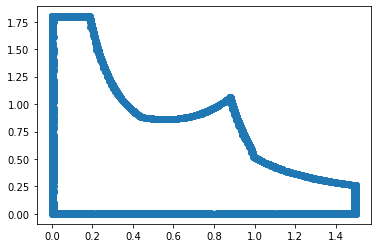

In [8]:
plt.scatter(alldata["pos"],alldata["rho"])
plt.show()

In [9]:
len(alldata)

9568

In [10]:
alldata.head()

pos       rho         ad        an        bd        bn         cd  \
0  0.016856  0.001609   0.915131  0.001000  0.003988  0.003988   0.001025   
1  0.029008  0.009265   2.284160  0.001000  0.040410  0.001000   0.007040   
2  0.036001  0.005410   1.433640  0.001000  0.001000  0.001000   0.001000   
3  0.045842  0.003719   0.450275  0.001000  0.005027  0.005027   0.004614   
4  0.051705  0.000305  15.594100  0.001966  0.565449  0.007616  16.422700   

         cn         dd        dn          ed        en  
0  0.001000  46.645600  0.001000    6.229660  0.001000  
1  0.001000  33.678400  0.001000    3.544060  0.003904  
2  0.001000   2.501610  0.001000    0.588351  0.001000  
3  0.004614  39.418200  0.001000    6.229660  0.001000  
4  0.003138   0.023001  0.003116  350.152000  0.002817

## low position - high steepness region

In [11]:
subdf_lowp_highs=alldata[(alldata["pos"]<1e-4)&(alldata["rho"]>1.5)]
len(subdf_lowp_highs)

275

In [12]:
subdf_lowp_highs

pos      rho          ad        an        bd        bn        cd  \
521  0.000069  1.51879     4.79559  0.001000  0.001252  0.001000  0.001000   
527  0.000092  1.54160     6.53786  0.001000  0.003050  0.001326  0.001000   
543  0.000055  1.62760     6.53786  0.001278  0.001520  0.001000  0.015964   
555  0.000091  1.68921     8.78049  0.001000  0.001000  0.001000  0.001000   
557  0.000090  1.69113     8.68321  0.001000  0.001000  0.001000  0.001000   
..        ...      ...         ...       ...       ...       ...       ...   
566  0.000061  1.77214     0.00100  0.001000  0.001000  0.001000  0.001502   
568  0.000015  1.78076   534.88800  0.022983  0.001000  0.001000  0.002082   
533  0.000052  1.57927  1000.00000  0.001000  0.001000  0.001000  0.124501   
555  0.000065  1.68418    13.00780  0.001000  0.001000  0.001000  0.010351   
561  0.000089  1.71196    14.97540  0.007437  0.001000  0.001000  0.001000   

           cn         dd       dn        ed        en  
521  0.001000    7.22571    0.001  0.001406  0.001406  
527  0.001000    7.22571    0.001  0.001406  0.001406  
543  0.001000    7.22571    0.001  0.001000  0.001000  
555  0.001000    7.22571    0.001  0.001000  0.001000  
557  0.001000    7.22571    0.001  0.001000  0.001000  
..        ...        ...      ...       ...       ...  
566  0.001171  143.57100  143.571  0.609640  0.001000  
568  0.001000  648.41200    0.001  0.012619  0.001000  
533  0.002186   52.62160    0.001  0.001000  0.001000  
555  0.001000   10.44330    0.001  0.001000  0.001000  
561  0.001000   10.44330    0.001  0.001000  0.001000  

[275 rows x 12 columns]

In [13]:
#first doublecheck that raw position is BEFORE x05:
othervars=np.array([0])
instance=instance100
subdf=subdf_lowp_highs
for i in range(len(subdf)):
    parset=subdf.iloc[i].values[2:].copy()
    #print(",".join(map(str,parset)))
    instance.fill_num_den(parset,othervars)
    pos,stp,x05=instance.interfaceps(minx0=False,maxx1=False,absder=True) #this will normalise the coefficients
    
    rawpos=pos*x05
    if rawpos>x05:
        print("instance where it doesn´t hold")
        makeplot(parset,instance=instance100,xmin=-10,xmax=10)
    else:
        print(".",end=",")

.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,

pos: 6.875032157902683e-05 stp: 1.51878661667872 x05: 5139.14955656569 raw position: 0.35331818465660425 raw steepness: 0.00029553267519493457


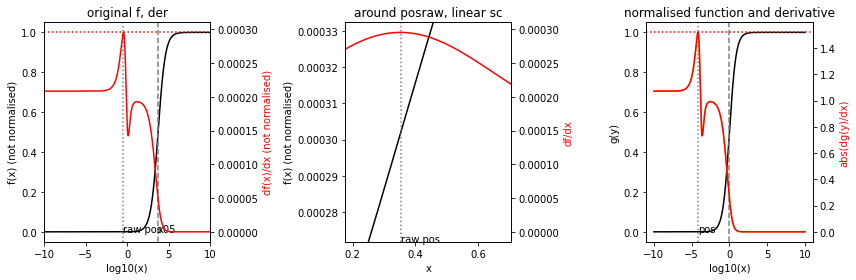

pos: 2.934997785052612e-05 stp: 1.5649895550248656 x05: 78234.07543871623 raw position: 2.296168381282711 raw steepness: 2.0003937494612334e-05


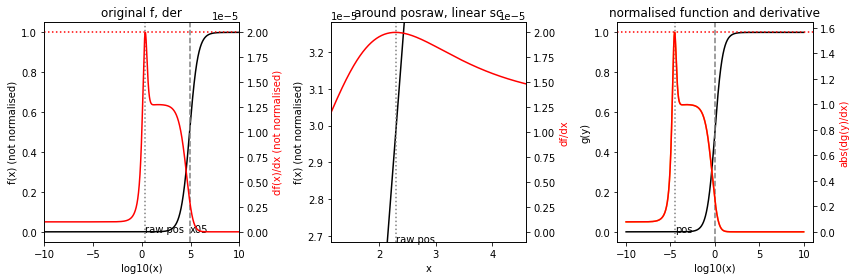

pos: 9.337984153291777e-07 stp: 1.6886887241465534 x05: 761044.5236376204 raw position: 0.7106621701677588 raw steepness: 2.2189092381546927e-06


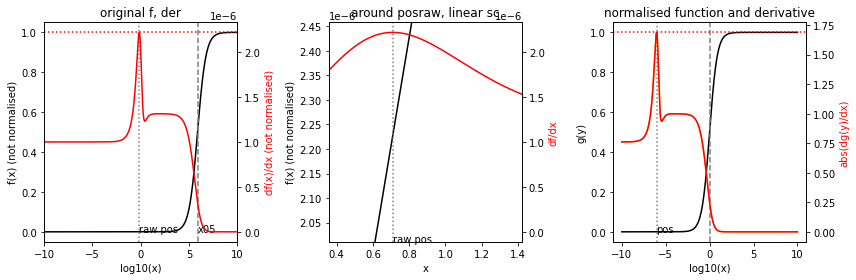

pos: 1.0265199825627906e-05 stp: 1.5662450239567571 x05: 165127.80849045463 raw position: 1.695069950922533 raw steepness: 9.485046996474222e-06


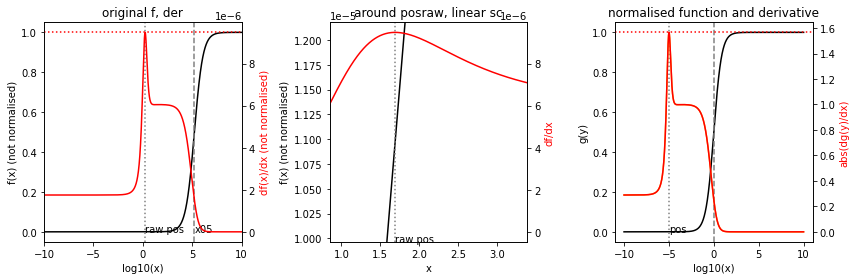

pos: 2.4654736087024295e-06 stp: 1.6956782218062458 x05: 364973.8628841074 raw position: 0.899833426806946 raw steepness: 4.646026453529046e-06


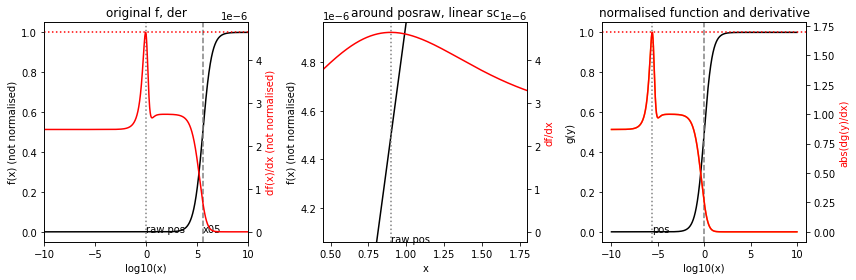

pos: 7.759556320732769e-05 stp: 1.6828959292215049 x05: 9334.844507522917 raw position: 0.7243425170140703 raw steepness: 0.0001802810885457455


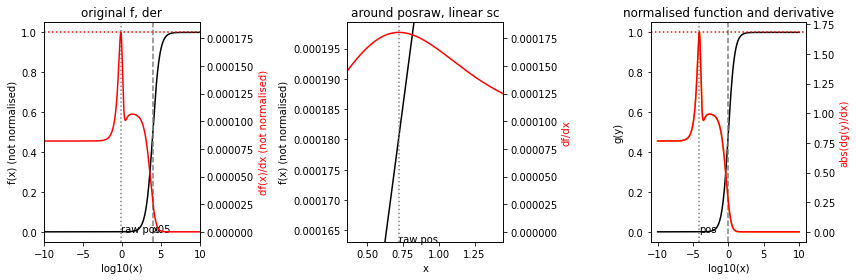

pos: 6.42262378574378e-06 stp: 1.5875367219064875 x05: 62234.55697122871 raw position: 0.3997091458986399 raw steepness: 2.5508926216674318e-05


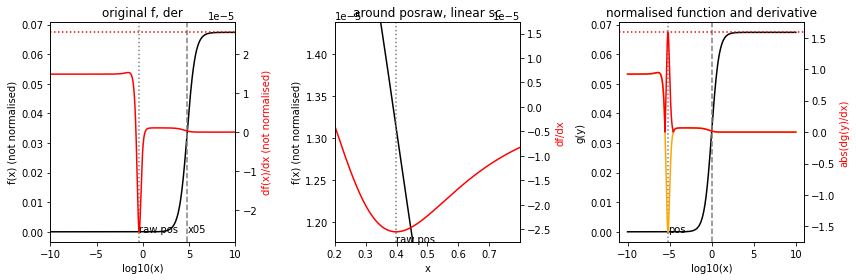

pos: 4.051796722562429e-07 stp: 1.704497427162994 x05: 1000000.6507998626 raw position: 0.4051799359471179 raw steepness: 1.7044963178770245e-06


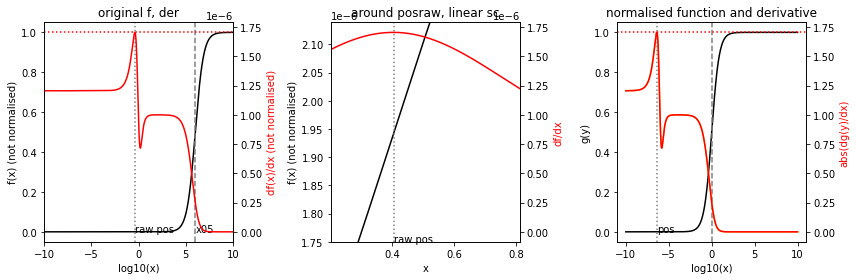

pos: 3.6118954133588594e-05 stp: 1.502356037457512 x05: 59127.89899917702 raw position: 2.135637871966734 raw steepness: 2.5408581446102503e-05


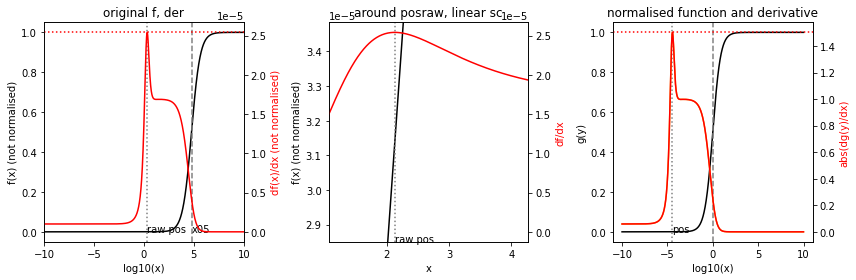

pos: 1.9561283583987877e-05 stp: 1.6005025259306684 x05: 108681.21770363399 raw position: 2.125944119753908 raw steepness: 1.4726578885922366e-05


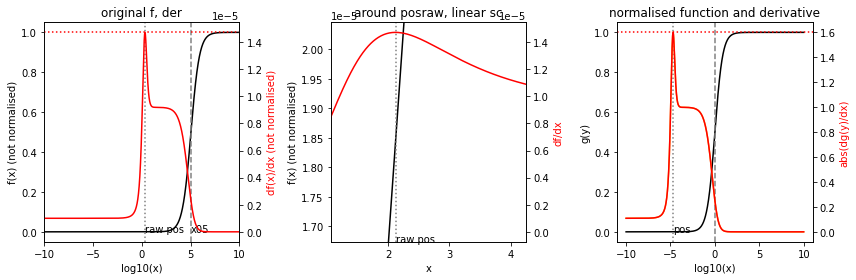

pos: 5.585598493436599e-06 stp: 1.705050861216679 x05: 108682.77376816688 raw position: 0.6070583374219837 raw steepness: 1.5688326697050932e-05


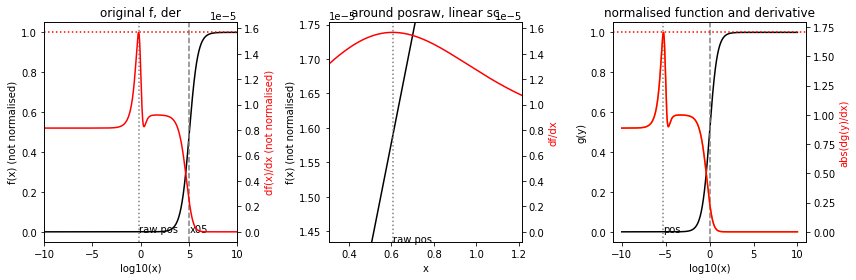

pos: 1.3311868192091754e-06 stp: 1.5125398177154208 x05: 604392.6003791995 raw position: 0.8045594632523488 raw steepness: 2.5025783187392504e-06


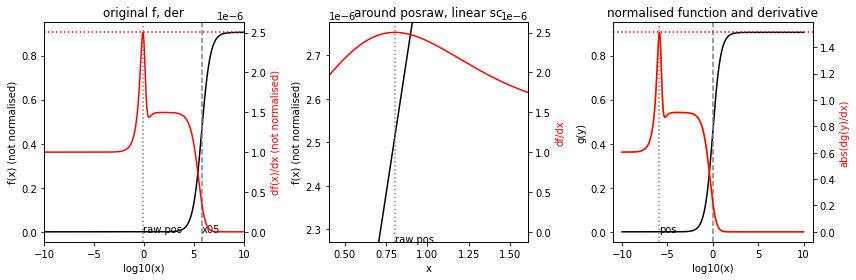

pos: 1.1944210085325187e-05 stp: 1.62379826507943 x05: 153739.30747380338 raw position: 1.8362945868395122 raw steepness: 1.0562024063729567e-05


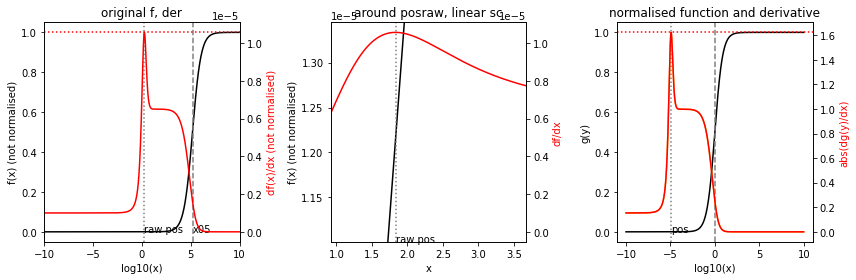

pos: 5.218003764041752e-07 stp: 1.7462439187688688 x05: 1000000.0143046128 raw position: 0.5218003838683276 raw steepness: 1.746243893789526e-06


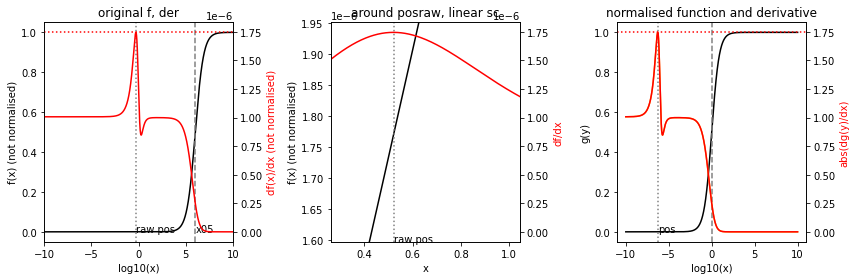

pos: 6.489290884338667e-06 stp: 1.5770151993700179 x05: 227349.78949824098 raw position: 1.47533891654725 raw steepness: 6.936514886820335e-06


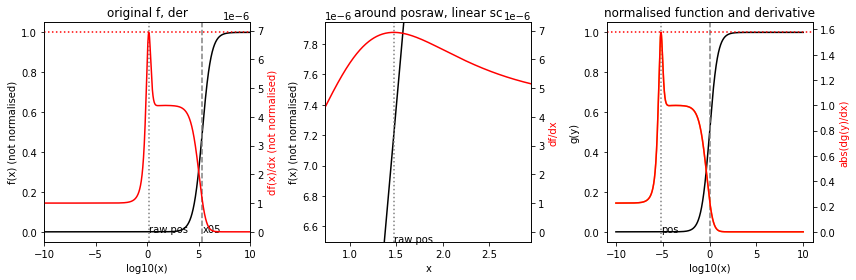

pos: 7.836582384778641e-06 stp: 1.6883729617537115 x05: 192857.38598067279 raw position: 1.5113427937505957 raw steepness: 8.754515432055643e-06


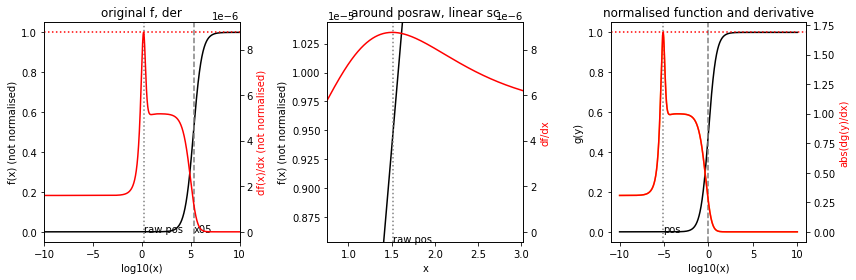

pos: 5.9577632637121125e-05 stp: 1.5287487389790198 x05: 49007.79799710079 raw position: 2.919768585425511 raw steepness: 3.1193989557936425e-05


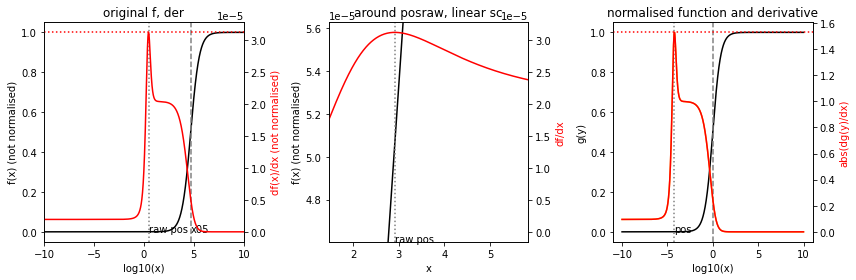

pos: 5.317009437036162e-07 stp: 1.6422436624710943 x05: 1000000.0685208495 raw position: 0.5317009801362166 raw steepness: 1.6422435499431712e-06


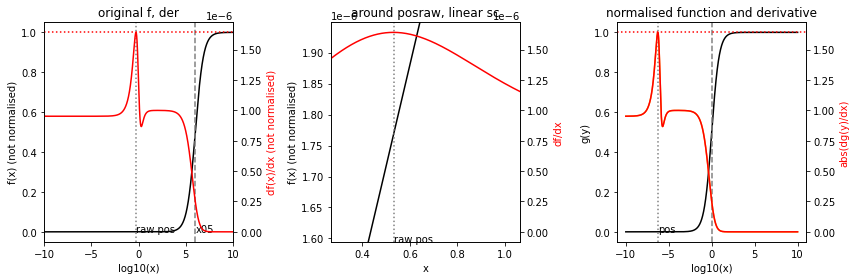

pos: 5.263522108981819e-07 stp: 1.7689523605696331 x05: 1000000.0003084079 raw position: 0.5263522110605131 raw steepness: 1.7689523600240743e-06


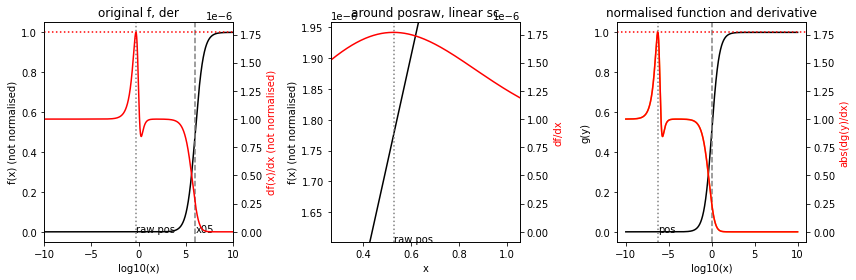

pos: 5.0960500698905195e-05 stp: 1.6731074106447854 x05: 14753.340550920146 raw position: 0.7518376214563525 raw steepness: 0.00011340532707627602


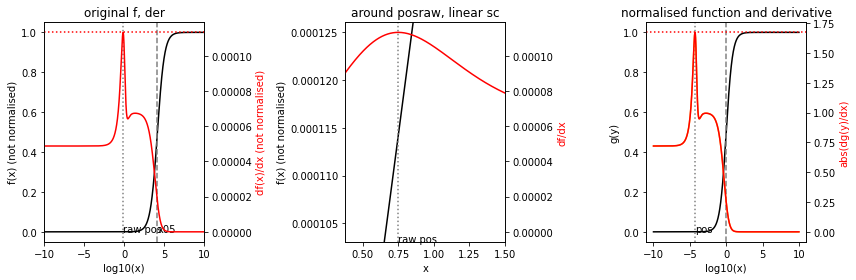

pos: 3.893905554796687e-05 stp: 1.5636979822164547 x05: 66768.73379986017 raw position: 2.5999114343001684 raw steepness: 2.3419614140110132e-05


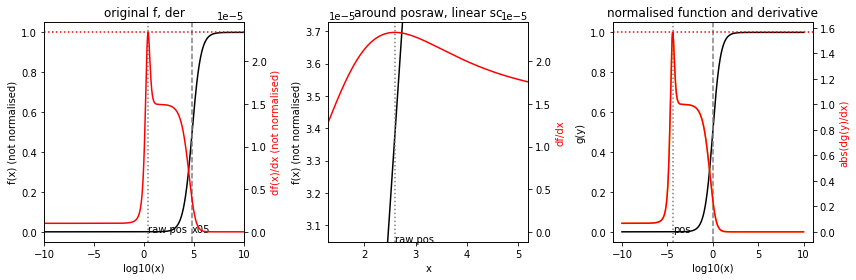

pos: 1.2611072769692563e-05 stp: 1.7041756305199995 x05: 63382.357154512705 raw position: 0.7993195183902038 raw steepness: 2.688722393781572e-05


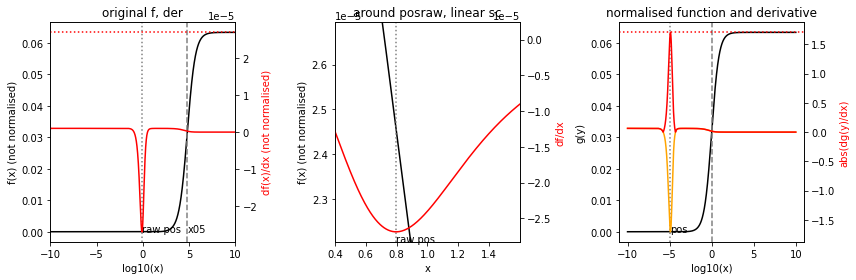

pos: 1.7543552022491833e-05 stp: 1.6428223817059104 x05: 91319.61646185405 raw position: 1.602070442072538 raw steepness: 1.7989808163420713e-05


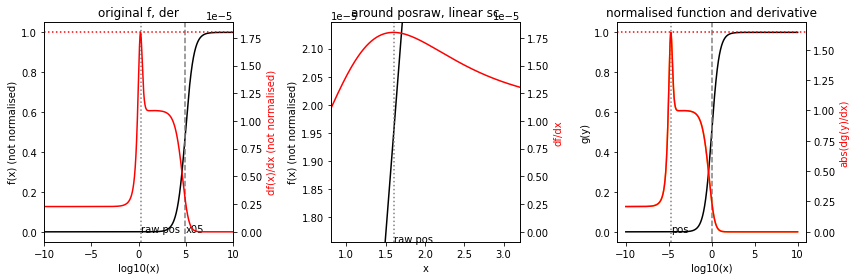

pos: 2.0692987973266407e-05 stp: 1.5625086788819131 x05: 104906.2850724985 raw position: 2.170824495325269 raw steepness: 1.4894328569561839e-05


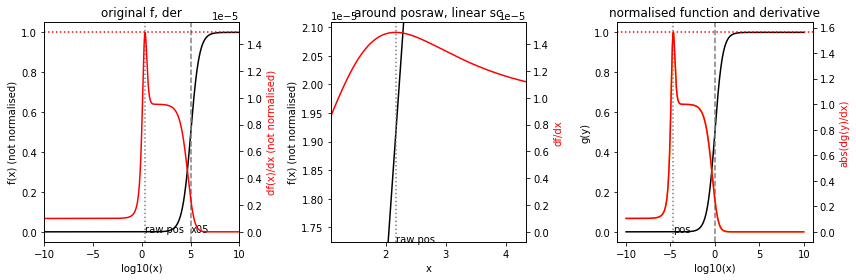

pos: 2.697107500669005e-06 stp: 1.667182108875616 x05: 329831.17864935054 raw position: 0.8895901458896619 raw steepness: 5.054652855144502e-06


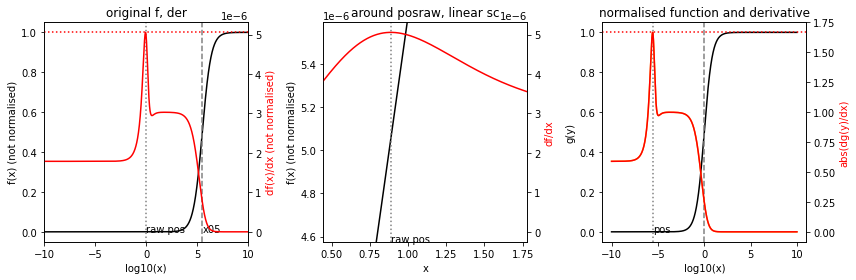

pos: 2.8491915274267164e-07 stp: 1.7969404350014386 x05: 435620.99108705943 raw position: 0.12411676369744788 raw steepness: 4.125008830537089e-06


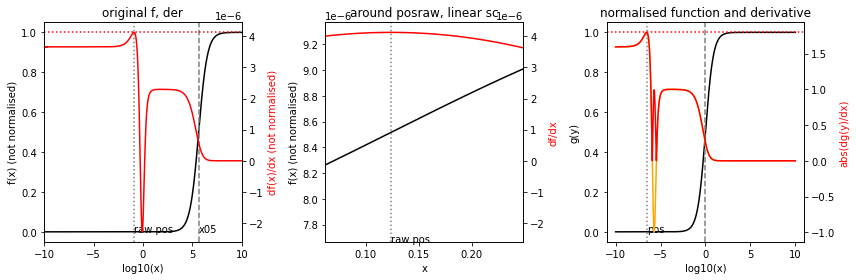

pos: 4.68896055359047e-06 stp: 1.6585451742333355 x05: 290810.581619143 raw position: 1.3635993457788633 raw steepness: 5.703180279751414e-06


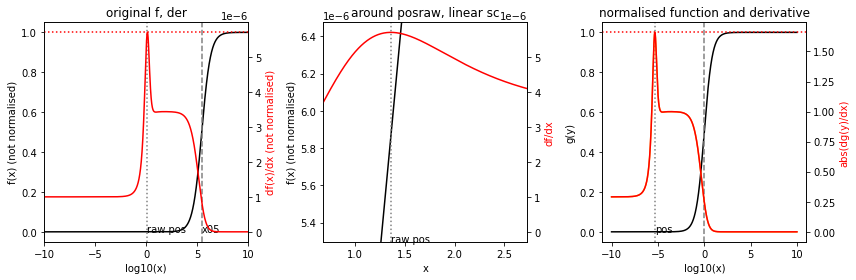

pos: 6.119372909326498e-05 stp: 1.7721411440916985 x05: 235.50128532082164 raw position: 0.01441120185503806 raw steepness: 0.007524974403759725


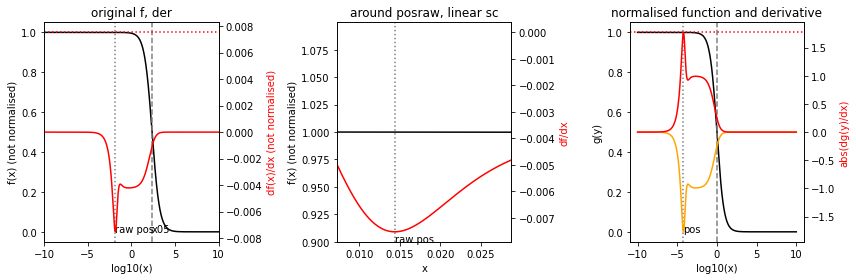

In [14]:
#now plot a few:
othervars=np.array([0])
instance=instance100
subdf=subdf_lowp_highs
for i in range(len(subdf))[::10]:
    parset=subdf.iloc[i].values[2:].copy()
    #print(",".join(map(str,parset)))
    instance.fill_num_den(parset,othervars)
    pos,stp,x05=instance.interfaceps(minx0=False,maxx1=False,absder=True) #this will normalise the coefficients
    
    if x05>1e-10 and x05<1e10:
        xmin=-10
        xmax=10
    else:
        print("x05 is too small or big, skipping", x05) #(numerical errors when plotting make these cases hard to interpret )
    makeplot(parset,instance=instance100,xmin=xmin,xmax=xmax)


# high position - low steepness region

In this case let's look at the data from a run with a grid for higher positions.

In [15]:
checkf="/Users/rosamartinezcorral/Dropbox (HMS)/data/2021_12_boundaries/2022_04_05_N4univ_allregion_bottomr/tocheck_N4univ"
checkedfiles1=[x for x in os.listdir(checkf) if ".out" in x and "checked" in x]#all parameter sets tested with max derivative not at 0 and coincident result with mathematica

In [16]:
alldata=[]
for f in checkedfiles1:
    
    data=pd.read_csv(os.path.join(checkf,f),sep=",|;",engine="python") #sep and engine are used to indicate that there are 2 separators
    alldata.append(data)
alldata=pd.concat(alldata)


In [17]:
subdf_highp_lows=alldata[(alldata["pos"]>9)&(alldata["rho"]<0.1)]
len(subdf_highp_lows)

1173

In [19]:
#first doublecheck that raw position is AFTER x05:
othervars=np.array([0])
instance=instance100
subdf=subdf_highp_lows
for i in range(len(subdf)):
    parset=subdf.iloc[i].values[2:].copy()
    #print(",".join(map(str,parset)))
    instance.fill_num_den(parset,othervars)
    pos,stp,x05=instance.interfaceps(minx0=False,maxx1=False,absder=True) #this will normalise the coefficients
    
    rawpos=pos*x05
    if rawpos<x05:
        print("instance where it doesn´t hold")
        makeplot(parset,instance=instance100,xmin=-10,xmax=10)
    else:
        print(".",end=",")

.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,

pos: 9.075620088390101 stp: 0.006517323435728706 x05: 0.06414258606258126 raw position: 0.5821337425908534 raw steepness: 0.10160680814100673


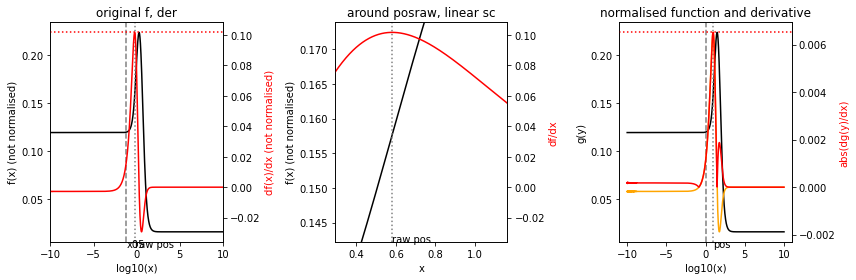

pos: 9.572882380603861 stp: 0.0061728901811463534 x05: 0.06077287391797701 raw position: 0.5817715739480621 raw steepness: 0.10157311614845933


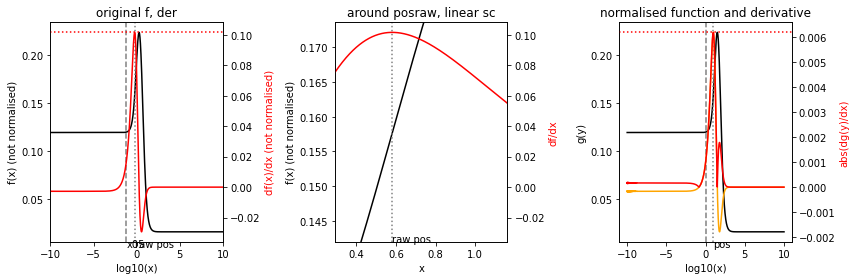

pos: 9.055921422879404 stp: 0.038071062039156174 x05: 0.0035214639645169818 raw position: 0.03189010095616717 raw steepness: 10.811146279720104


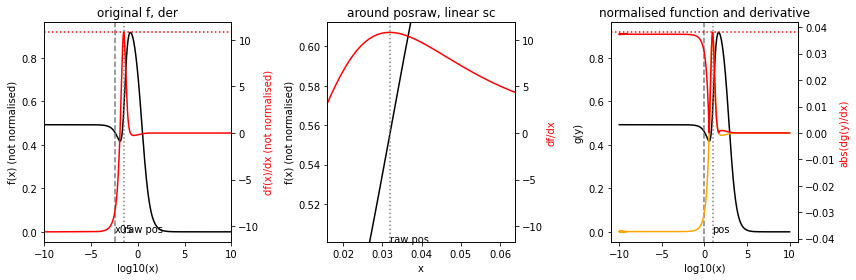

pos: 9.392148376723913 stp: 0.003201295595777051 x05: 0.08388769715493602 raw position: 0.7878856986608396 raw steepness: 0.03816168168097918


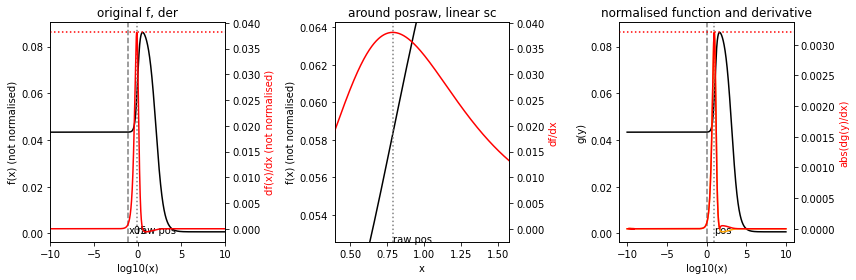

pos: 9.966739566843831 stp: 0.0030157847945047837 x05: 0.07913508322451643 raw position: 0.7887187650992674 raw steepness: 0.038109327388316676


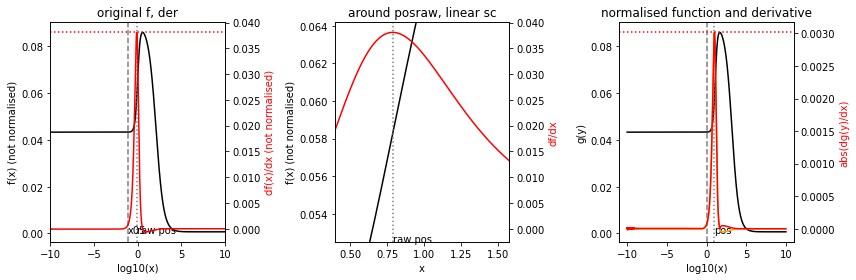

pos: 9.428962991050948 stp: 0.036919435424585395 x05: 0.10706105212408859 raw position: 1.0094746982610079 raw steepness: 0.3448446908759509


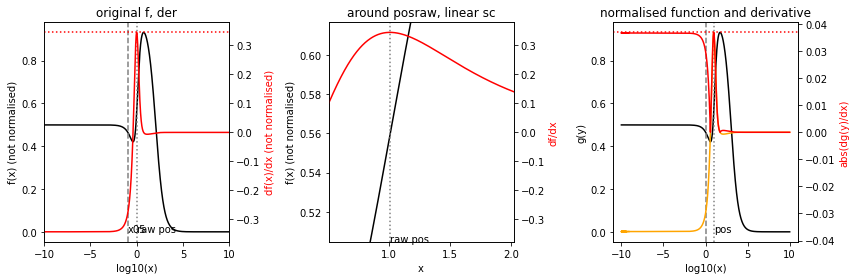

pos: 9.910366677669431 stp: 0.03482952207677786 x05: 0.09696560853954102 raw position: 0.9609647357502058 raw steepness: 0.35919459075611265


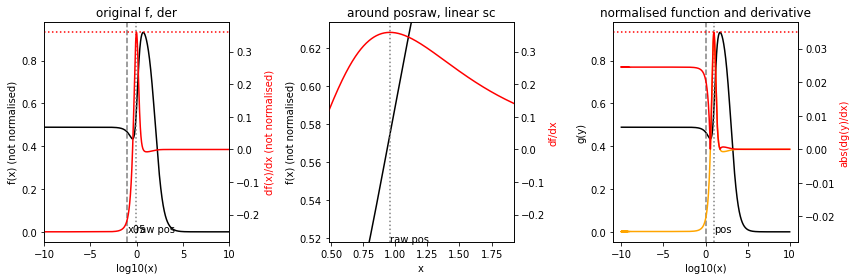

pos: 9.079367752355772 stp: 0.03740132722479401 x05: 0.0015378579665837441 raw position: 0.013962778029503867 raw steepness: 24.3204041189049


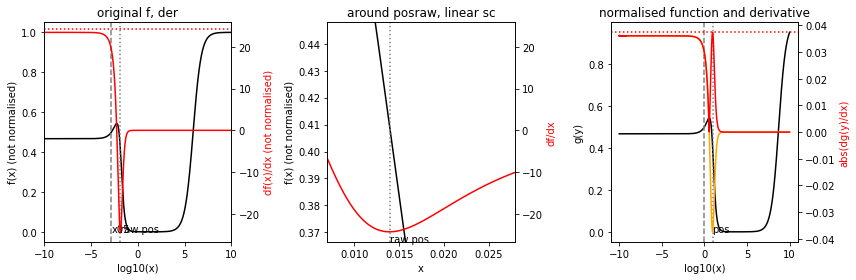

pos: 9.506169257844459 stp: 0.03574000858242099 x05: 0.20149146427016157 raw position: 1.915411963363075 raw steepness: 0.17737728350864762


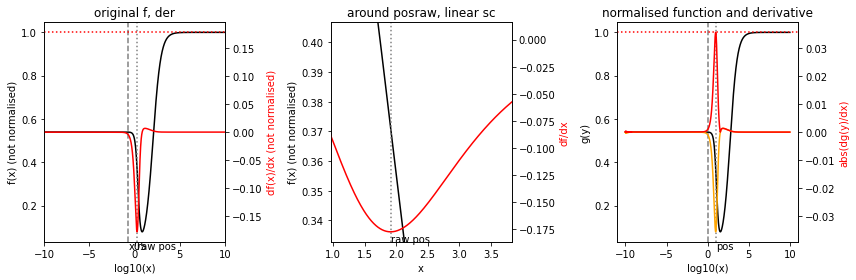

pos: 9.018013276846306 stp: 0.008182626314359186 x05: 0.07842198827934785 raw position: 0.7072105314998443 raw steepness: 0.104340969846515


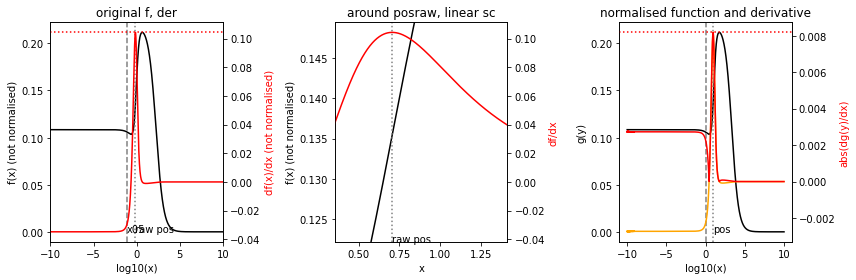

pos: 9.802227654508394 stp: 0.009163315758904375 x05: 0.12436911204705804 raw position: 1.2190943494743254 raw steepness: 0.07367838853297605


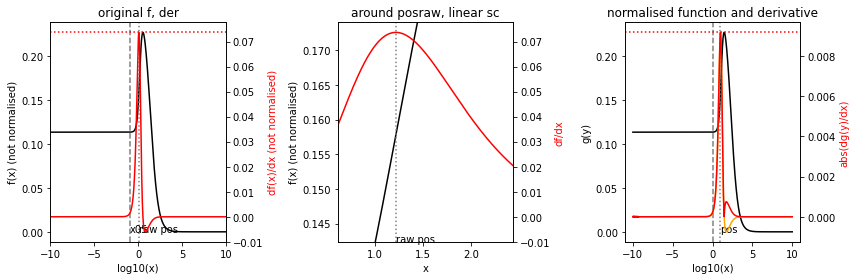

pos: 9.283692319122345 stp: 0.03683691399569699 x05: 0.04879523293161932 raw position: 0.45299992917705995 raw steepness: 0.7549285408129831


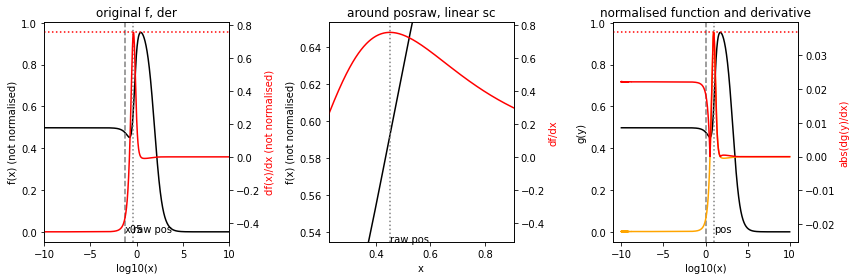

pos: 9.78141758124453 stp: 0.03509849704551425 x05: 0.046798100027556605 raw position: 0.4577517583783823 raw steepness: 0.7499983337966037


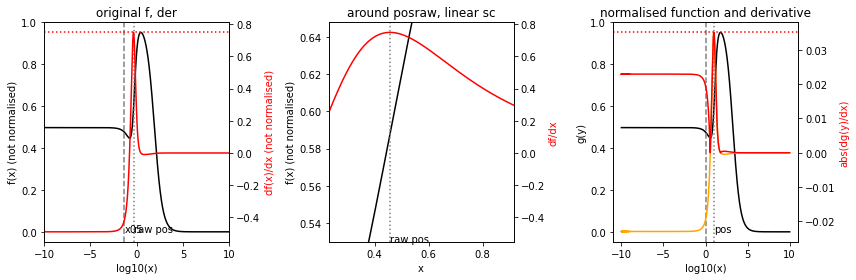

pos: 9.22266501031973 stp: 0.0021903859462294034 x05: 0.0067054222261939125 raw position: 0.061841862944938826 raw steepness: 0.3266589145830263


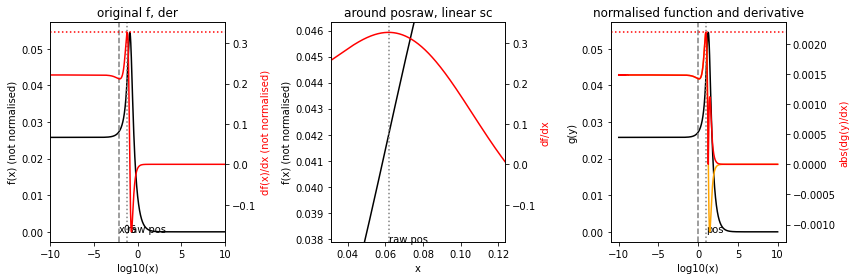

pos: 9.696716325725694 stp: 0.0020695678731873614 x05: 0.006382564056646725 raw position: 0.06188991308807631 raw steepness: 0.32425336507702396


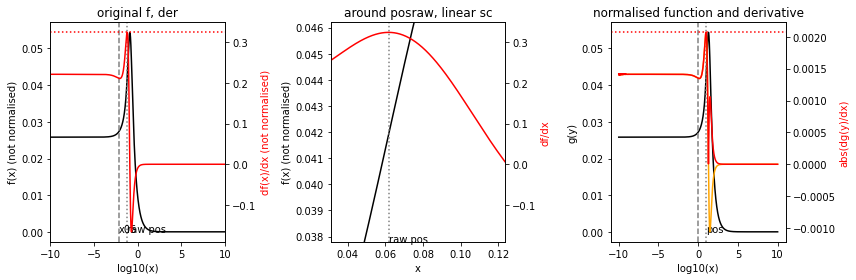

pos: 9.236673930081961 stp: 0.037568059110490715 x05: 0.11359187841718753 raw position: 1.0492111420450758 raw steepness: 0.33072839039174046


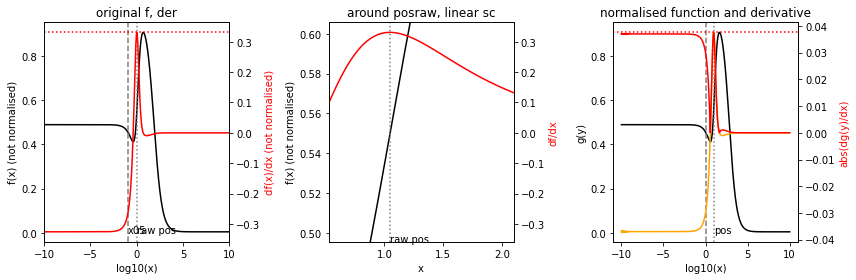

pos: 9.747041837397301 stp: 0.035495779030434785 x05: 0.10775549647291144 raw position: 1.0502973323309852 raw steepness: 0.3294103799090939


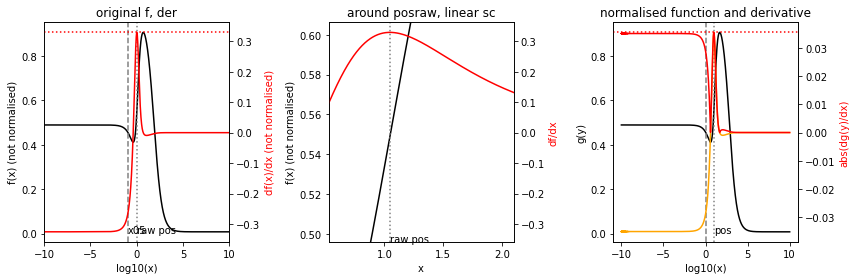

pos: 9.54230237588816 stp: 0.0007765901291015491 x05: 0.04121944842808291 raw position: 0.3933284406680951 raw steepness: 0.018840381390752826


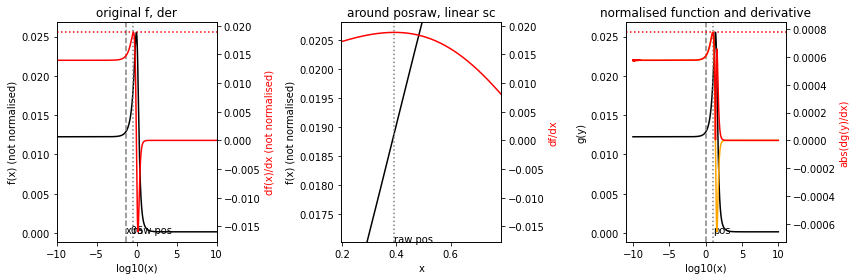

pos: 9.153573522442931 stp: 0.03775827749747076 x05: 0.0933371536743663 raw position: 0.8543684985338663 raw steepness: 0.4045364146115002


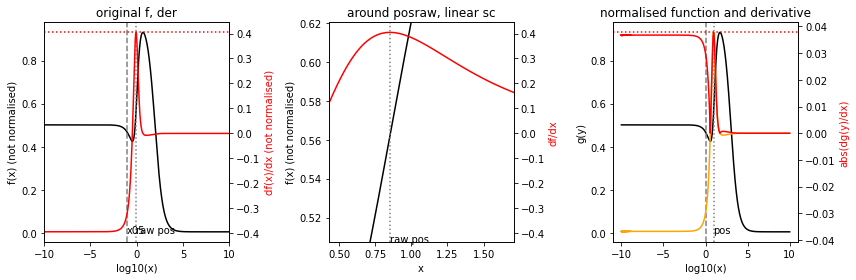

pos: 9.668590231999673 stp: 0.03588493283607105 x05: 0.08851920748427222 raw position: 0.8558559448267867 raw steepness: 0.4053914834522999


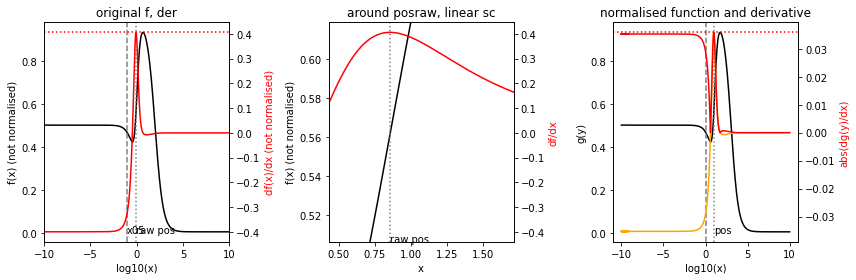

pos: 9.255114640743912 stp: 0.006654833396504824 x05: 0.008241275155952804 raw position: 0.07627394635425785 raw steepness: 0.8075004499392224


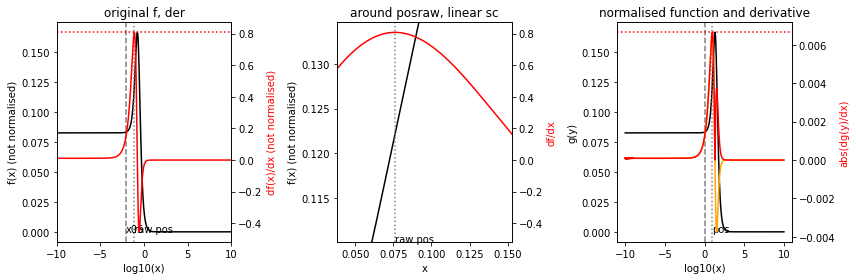

pos: 9.771653899114272 stp: 0.006298023081675452 x05: 0.00780145633554132 raw position: 0.07623313121996207 raw steepness: 0.8072881281131276


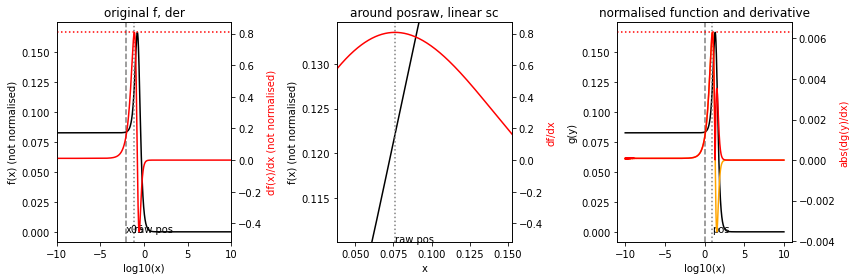

pos: 9.275298452779811 stp: 0.03742621049337254 x05: 0.10822889172725304 raw position: 1.0038552719838638 raw steepness: 0.34580609572987314


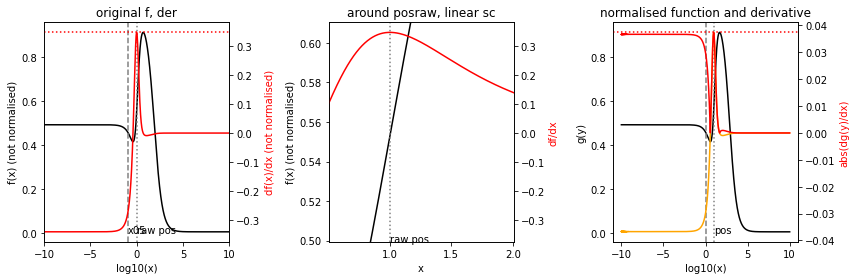

pos: 9.784909899987829 stp: 0.0350774965486771 x05: 0.10208894925279832 raw position: 0.9989311702230613 raw steepness: 0.34359739036804327


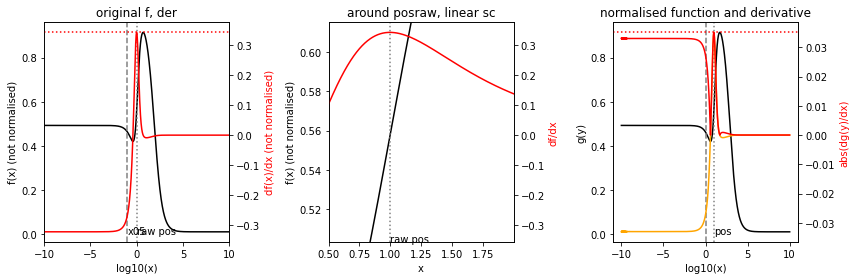

pos: 9.437001858016485 stp: 8.264889591942917e-07 x05: 0.029992346828955217 raw position: 0.2830378327511252 raw steepness: 2.7556661834691196e-05


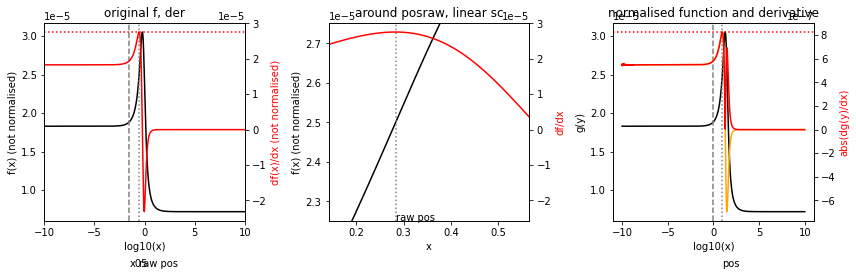

pos: 9.986326900136103 stp: 1.0247118089414073e-05 x05: 0.02934450443944551 raw position: 0.293043814054798 raw steepness: 0.00034920058406710314


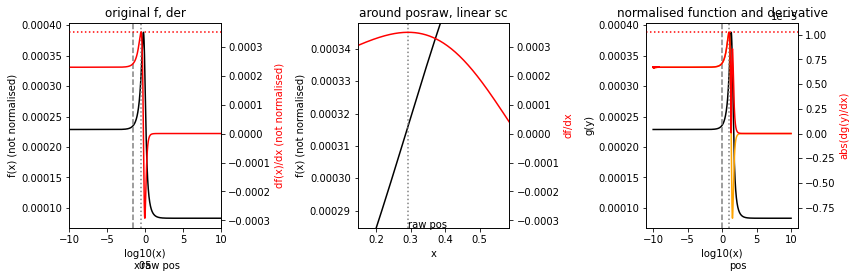

pos: 9.505111448064477 stp: 0.009980442701641388 x05: 0.13685358214320797 raw position: 1.3008085503380384 raw steepness: 0.07292788793206402


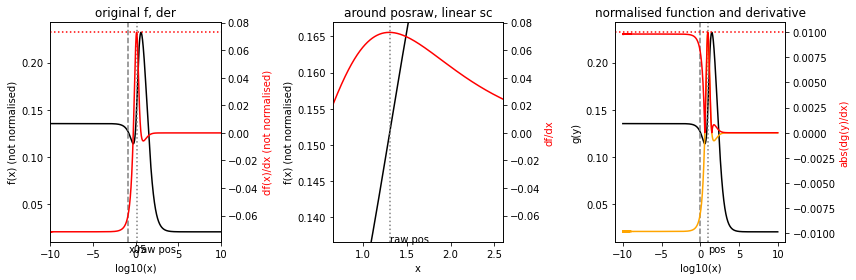

pos: 9.36813314881441 stp: 0.03683125059006767 x05: 0.1294723626386095 raw position: 1.212914332290078 raw steepness: 0.28447191230203406


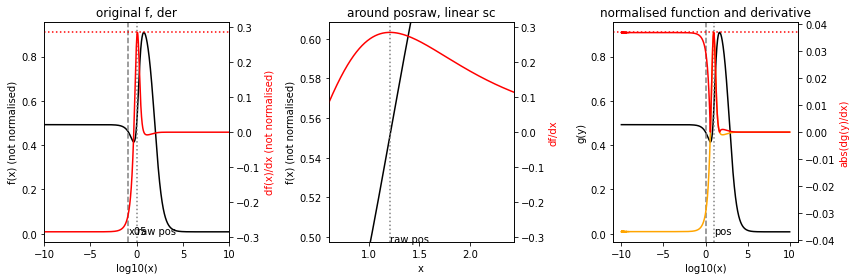

pos: 9.868131004558009 stp: 0.03511621329680224 x05: 0.12297676050122149 raw position: 1.2135507831422085 raw steepness: 0.28555162092152725


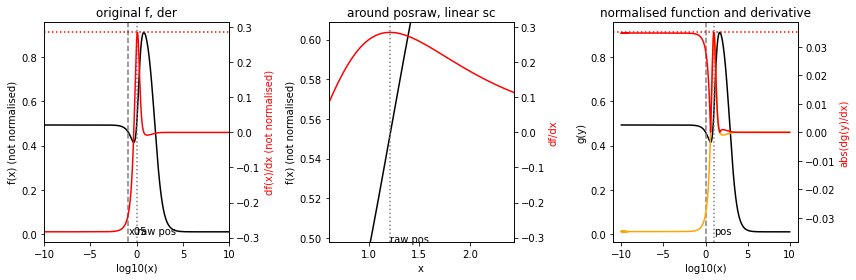

pos: 9.394351445740087 stp: 2.9140739466379085e-06 x05: 0.028905112427630733 raw position: 0.2715447847237925 raw steepness: 0.00010081517426835232


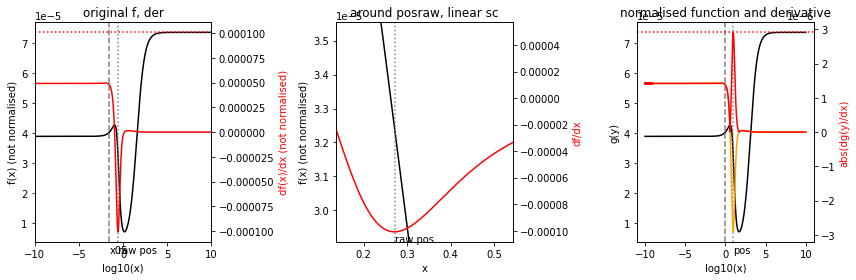

pos: 9.91389889509404 stp: 2.8046248347539744e-06 x05: 0.03011770226894193 raw position: 0.2985838552468347 raw steepness: 9.312213825973597e-05


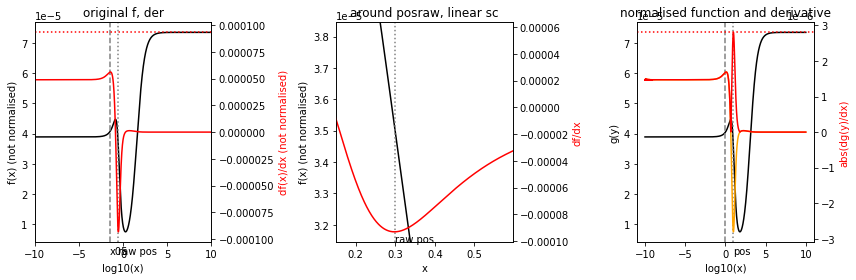

pos: 9.375927254944743 stp: 0.03715013393865484 x05: 0.033227741707700945 raw position: 0.3115408890974975 raw steepness: 1.1180457060686986


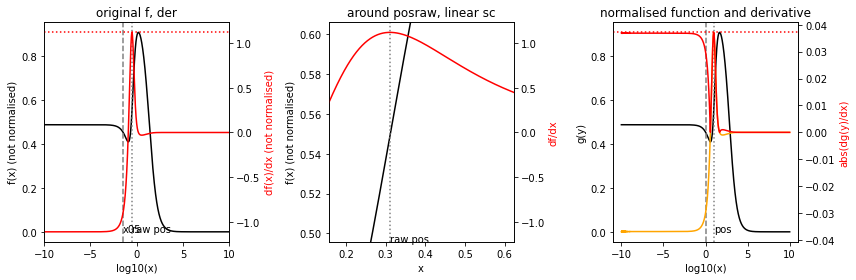

pos: 9.88518088684457 stp: 0.03529485853196275 x05: 0.0314867476288008 raw position: 0.31125219584912023 raw steepness: 1.1209432917002418


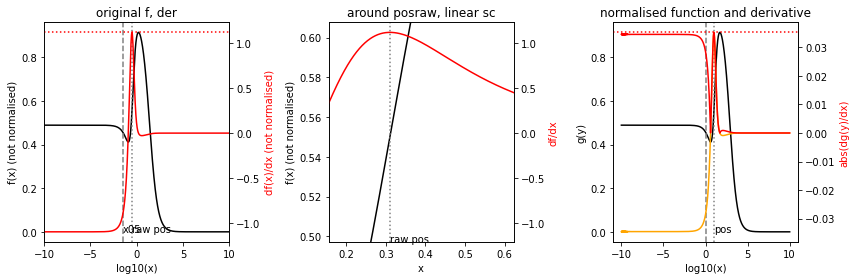

pos: 9.416046870437096 stp: 0.0021620515638687784 x05: 0.1497716352882213 raw position: 1.4102567377359023 raw steepness: 0.014435654386146718


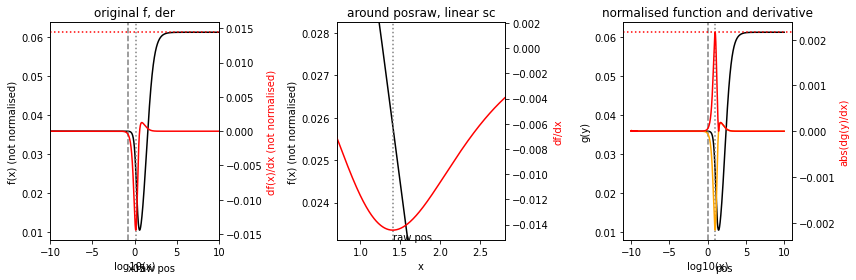

pos: 9.920949396566542 stp: 0.0020509251175908206 x05: 0.14212790031477412 raw position: 1.410043706863128 raw steepness: 0.014430137313283225


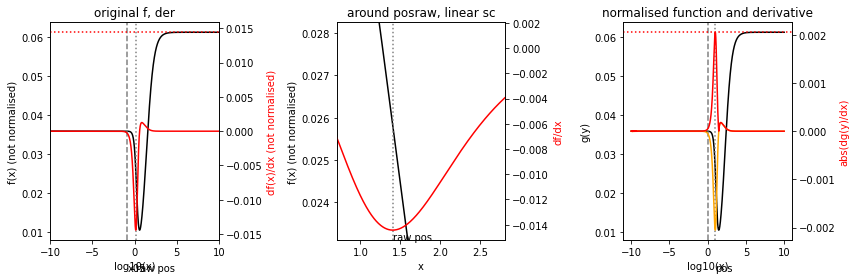

pos: 9.53146978950045 stp: 0.034480354655339274 x05: 0.003143901751156015 raw position: 0.02996600456230112 raw steepness: 10.967376649941691


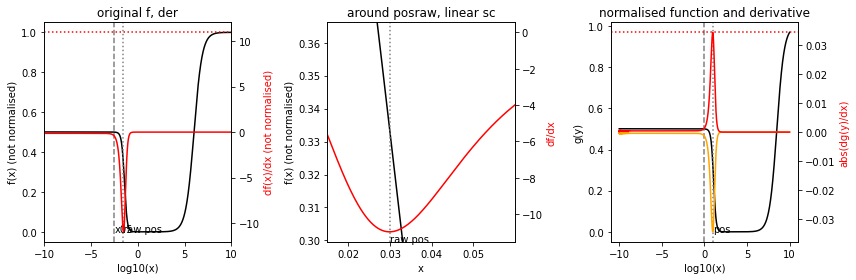

pos: 9.142137514096133 stp: 0.0012836661287488405 x05: 0.04435316350583883 raw position: 0.4054827199555687 raw steepness: 0.02894192944275223


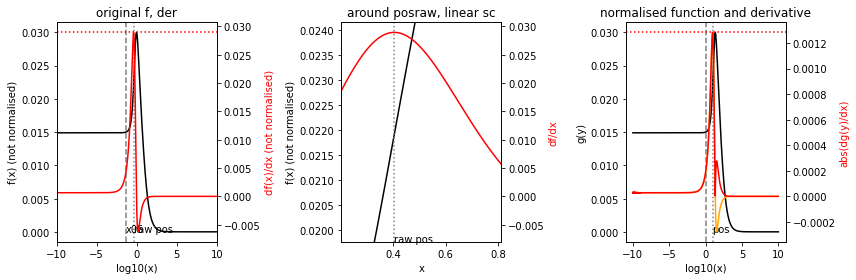

pos: 9.659832995823576 stp: 0.0012147889280732264 x05: 0.04204055752462522 raw position: 0.4061047647391938 raw steepness: 0.028895642674616407


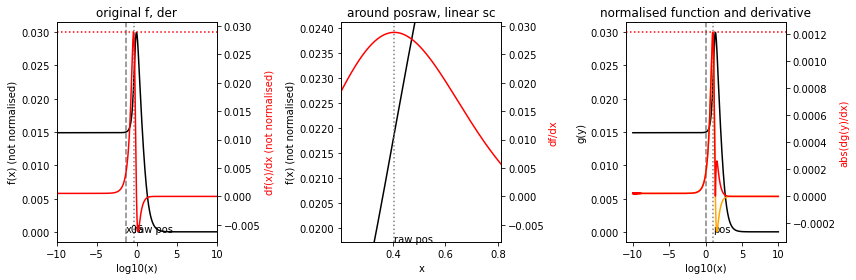

pos: 9.136175934559551 stp: 0.03804997055714118 x05: 0.09834448696395716 raw position: 0.8984925350967109 raw steepness: 0.38690496774960387


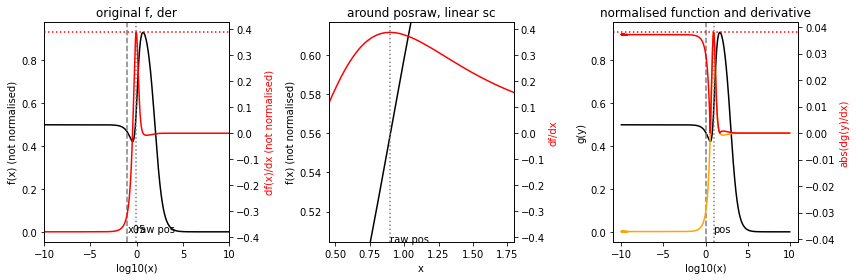

pos: 9.64623271933115 stp: 0.03595934212233963 x05: 0.09328561105709586 raw position: 0.8998547136217578 raw steepness: 0.385475763248531


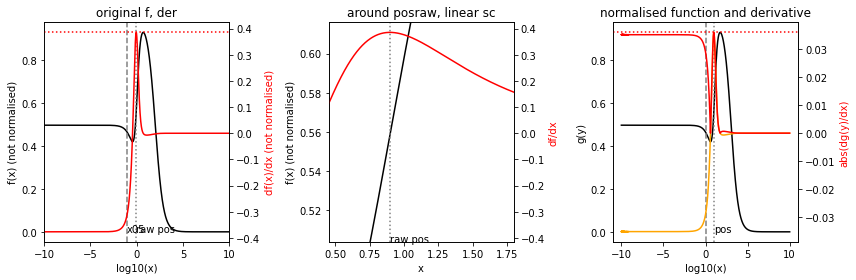

pos: 9.272791094341189 stp: 0.008979750827095217 x05: 0.11383370998488664 raw position: 1.0555562121836746 raw steepness: 0.07888481213770009


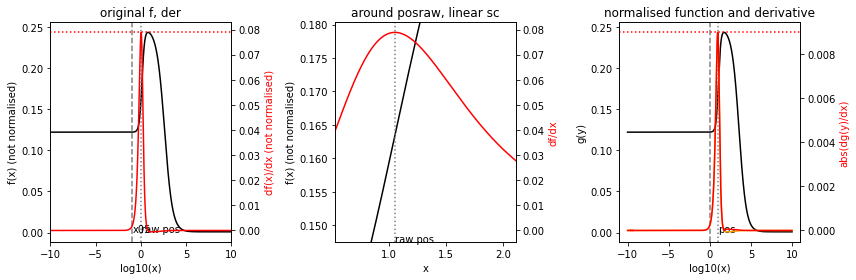

pos: 9.789721699230022 stp: 0.009350369125315667 x05: 0.05255443491697643 raw position: 0.514493291897496 raw steepness: 0.17791779399944146


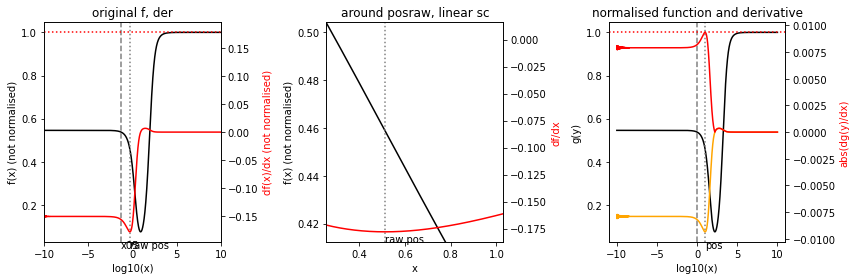

pos: 9.320314402929448 stp: 0.03428937650460337 x05: 0.08143563064699295 raw position: 0.7590056812308111 raw steepness: 0.4210611035019905


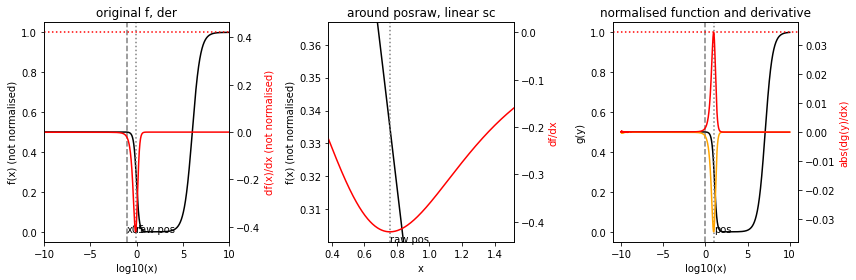

pos: 9.830333975549975 stp: 0.03205645051651424 x05: 0.07677904687474675 raw position: 0.754763673103167 raw steepness: 0.41751560902819523


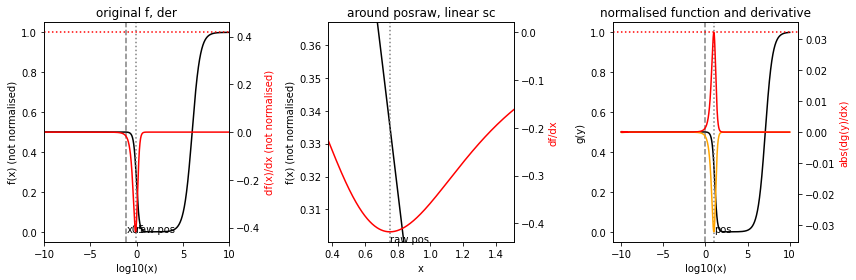

pos: 9.385145289717764 stp: 0.0010593991762842194 x05: 0.03761973103713045 raw position: 0.353066641543574 raw steepness: 0.028160732335874458


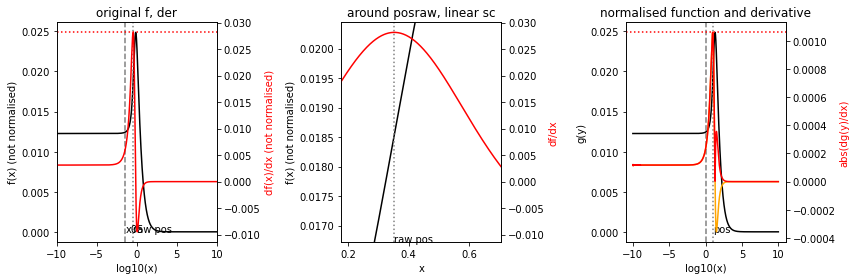

pos: 9.878379420452816 stp: 0.0010062555723139494 x05: 0.035737669251329644 raw position: 0.35303025646728414 raw steepness: 0.02815672072057444


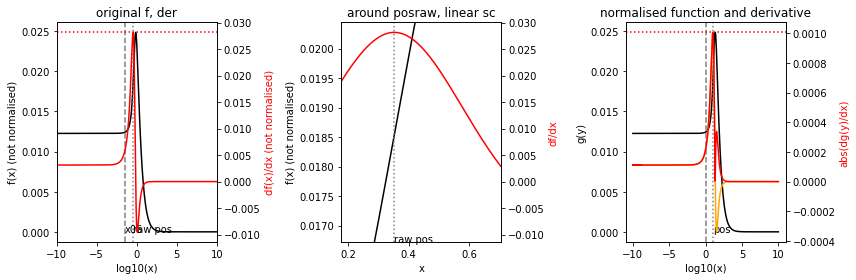

pos: 9.491893522174808 stp: 0.035722170768482366 x05: 0.1092398331022025 raw position: 1.0368928641862531 raw steepness: 0.32700682300623296


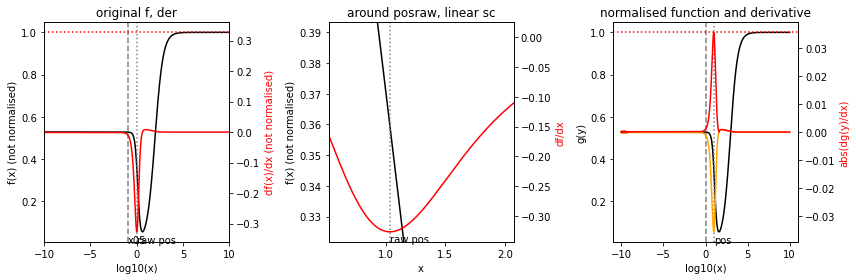

In [20]:
#now plot a few:
othervars=np.array([0])
instance=instance100
subdf=subdf_highp_lows
for i in range(len(subdf))[::25]:
    parset=subdf.iloc[i].values[2:].copy()
    #print(",".join(map(str,parset)))
    instance.fill_num_den(parset,othervars)
    pos,stp,x05=instance.interfaceps(minx0=False,maxx1=False,absder=True) #this will normalise the coefficients
    
    if x05>1e-10 and x05<1e10:
        xmin=-10
        xmax=10
    else:
        print("x05 is too small or big, skipping", x05) #(numerical errors when plotting make these cases hard to interpret )
    makeplot(parset,instance=instance100,xmin=xmin,xmax=xmax)
